In [125]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

In [126]:
load_dotenv(dotenv_path="../Misc/.env")
API_TOKEN = os.getenv("API_TOKEN")

HEADERS = {"Authorization": f"Bearer {API_TOKEN}"}
BASE_URL = "https://apis.estudante.ibmec.br/rest/v2.1/trabalhos?idEntrega="
URL = "https://apis.estudante.ibmec.br/rest/turmas/status?status=ATUAL"


In [127]:
def checar_status_api():
    try:
        response = requests.get(URL, headers=HEADERS, timeout=10)
        return {
            "url": URL,
            "status_code": response.status_code,
            "ok": response.ok
        }
    except requests.exceptions.RequestException as e:
        return {
            "url": URL,
            "status_code": None,
            "error": str(e)
        }

In [128]:
def pegar_disciplinas_dataframe():
    try:
        response = requests.get(URL, headers=HEADERS, timeout=10)
        response.raise_for_status()  # dispara erro se status != 200
        data = response.json()

        # Se o JSON vier como {"disciplinas": [...]}, ajusta aqui
        if isinstance(data, dict) and "disciplinas" in data:
            data = data["disciplinas"]

        df = pd.DataFrame(data)
        return df
    except requests.exceptions.RequestException as e:
        print(f"Erro de requisição: {e}")
        return pd.DataFrame()
    except ValueError as e:
        print(f"Erro ao decodificar JSON: {e}")
        return pd.DataFrame()

In [129]:
status = checar_status_api()
print(status)

turmas_df = pegar_disciplinas_dataframe()
turmas_df.head()

{'url': 'https://apis.estudante.ibmec.br/rest/turmas/status?status=ATUAL', 'status_code': 200, 'ok': True}


,id,idExterno,marca,codigoEntrega,formato,campus,tipoCurso,educadorResponsavel,periodoAcademico,local,horarios,educadores,totalAlunosMatriculados,codigoDisciplina,dataAtualizacao,tipoTurma,teams,possuiExercicios,nome
0,ibmec_13769810,None,IBMEC,8001,presencial,BELO HORIZONTE - FUNCIONÁRIOS,GRADUAÇÃO,"{'nome': 'CRISTIANO DE MACEDO NETO', 'perfil':...",2025.2,"{'blocos': ['1', '1', '1', '1'], 'salas': ['30...","[{'diaSemana': 'Seg', 'horaInicio': '10:30:00Z...","[{'nome': 'CRISTIANO DE MACEDO NETO', 'perfil'...",7,IBM4028,2025-09-01T19:45:27.233-03:00,normal,False,False,PROJETO EM CIÊNCIA DE DADOS IV
1,ibmec_13886090,None,IBMEC,8002,presencial,BELO HORIZONTE - FUNCIONÁRIOS,GRADUAÇÃO,"{'nome': 'CRISTIANO DE MACEDO NETO', 'perfil':...",2025.2,"{'blocos': ['1', '1', '1', '1'], 'salas': ['L1...","[{'diaSemana': 'Ter', 'horaInicio': '10:30:00Z...","[{'nome': 'CRISTIANO DE MACEDO NETO', 'perfil'...",6,IBM8916,2025-08-28T07:44:19.776-03:00,normal,False,False,BIG DATA E CLOUD COMPUTING
2,ibmec_13886091,None,IBMEC,8002,presencial,BELO HORIZONTE - FUNCIONÁRIOS,GRADUAÇÃO,"{'nome': 'MARCOS FLAVIO ARAUJO ASSUNCAO', 'per...",2025.2,"{'blocos': ['1', '1', '1', '1'], 'salas': ['30...","[{'diaSemana': 'Qui', 'horaInicio': '10:30:00Z...","[{'nome': 'MARCOS FLAVIO ARAUJO ASSUNCAO', 'pe...",11,IBM8935,2025-08-28T07:41:52.609-03:00,normal,False,False,SEGURANÇA DA INFORMAÇÃO
3,ibmec_13887814,None,IBMEC,8002,presencial,BELO HORIZONTE - FUNCIONÁRIOS,GRADUAÇÃO,"{'nome': 'ILDEU ROLA FRANCA', 'perfil': 'profe...",2025.2,"{'blocos': ['1', '1', '1', '1'], 'salas': ['2A...","[{'diaSemana': 'Qua', 'horaInicio': '16:30:00Z...","[{'nome': 'ILDEU ROLA FRANCA', 'perfil': 'prof...",60,IBM0472,2025-09-05T07:41:55.332-03:00,normal,False,False,GEOMETRIA ANALÍTICA E ÁLGEBRA LINEAR
4,ibmec_13897470,None,IBMEC,8003,presencial,BELO HORIZONTE - FUNCIONÁRIOS,GRADUAÇÃO,"{'nome': 'PEDRO HENRIQUE CALAIS GUERRA', 'perf...",2025.2,"{'blocos': ['1', '1', '1', '1'], 'salas': ['30...","[{'diaSemana': 'Ter', 'horaInicio': '12:50:00Z...","[{'nome': 'PEDRO HENRIQUE CALAIS GUERRA', 'per...",9,IBM8915,2025-08-27T19:03:25.569-03:00,normal,False,False,EXTRAÇÃO E PREPARAÇÃO DE DADOS


In [130]:
def checar_status_trabalhos(entrega_id="ibmec_13897470"):
    url = f"{BASE_URL}{entrega_id}"
    try:
        response = requests.get(url, headers=HEADERS, timeout=10)
        return {
            "url": url,
            "status_code": response.status_code,
            "ok": response.ok
        }
    except requests.exceptions.RequestException as e:
        return {
            "url": url,
            "status_code": None,
            "error": str(e)
        }

In [131]:
def pegar_trabalhos_dataframe(entrega_id="ibmec_13897470"):
    url = f"{BASE_URL}{entrega_id}"
    try:
        response = requests.get(url, headers=HEADERS, timeout=10)
        response.raise_for_status()

        # Se a resposta estiver vazia
        if not response.text.strip():
            print("⚠️ Resposta vazia da API.")
            return pd.DataFrame()

        try:
            data = response.json()
        except ValueError:
            print("⚠️ A resposta não está em formato JSON. Conteúdo bruto:")
            print(response.text[:500])  # mostra os 500 primeiros caracteres
            return pd.DataFrame()

        # Se o JSON tiver chave "entregas"
        if isinstance(data, dict) and "entregas" in data:
            data = data["entregas"]

        # Converte em DataFrame
        df = pd.DataFrame(data)
        return df

    except requests.exceptions.RequestException as e:
        print(f"Erro de requisição: {e}")
        return pd.DataFrame()

In [132]:
status_trabalhos = checar_status_trabalhos()
print(status_trabalhos)

df_trabalhos = pegar_trabalhos_dataframe()
df_trabalhos.head(20)

{'url': 'https://apis.estudante.ibmec.br/rest/v2.1/trabalhos?idEntrega=ibmec_13897470', 'status_code': 200, 'ok': True}


,id,entregas,modelo,titulo,avaliacao,enunciado,obrigatorio,tipoTrabalho,prazoEntrega,temResposta,quantidadeMateriaisApoio,statusResposta,periodosAcademicosExcluidos,dataAtualizacao,permitirEnvioForaPrazo
0,68a48b2fd22b6f2a8edac24c,[ibmec_13897470],COMUM,Entrega aula 1 - Tabela / Camelot,{'tipo': 'NENHUMA_CORRECAO'},Entrega aula 1 - Tabela / Camelot,True,INDIVIDUAL,2025-08-30T14:32:59.000Z,True,0,RESPONDIDO,[],2025-08-19T14:34:38.870Z,False
1,68a48b3cd22b6f2a8edac5a6,[ibmec_13897470],COMUM,Entrega 2 - OCR,{'tipo': 'NENHUMA_CORRECAO'},Entrega 2 - OCR,True,INDIVIDUAL,2025-08-30T14:33:20.000Z,True,0,RESPONDIDO,[],2025-08-19T14:34:23.733Z,False
2,68a70b8a76436b9675e0edfe,[ibmec_13897470],COMUM,Entrega aula 3 - extração XML,{'tipo': 'NENHUMA_CORRECAO'},Entrega aula 3 - extração XML,False,INDIVIDUAL,2025-08-30T12:04:55.000Z,True,0,RESPONDIDO,[],2025-08-21T14:29:09.849Z,False
3,68ada45bf19ae253664a3c92,"[ibmec_13886089, ibmec_13897470]",COMUM,Código 4,{'tipo': 'NENHUMA_CORRECAO'},Código 4 - API e regexes.,True,INDIVIDUAL,2025-09-06T12:10:44.000Z,True,0,RESPONDIDO,[],2025-08-26T12:11:33.004Z,False
4,68b0483aecfb95c31a3c5cf1,"[ibmec_13886089, ibmec_13897470]",COMUM,Atividade 1 - Regexes,{'tipo': 'NENHUMA_CORRECAO'},Atividade 1 - Regexes,True,INDIVIDUAL,2025-09-02T12:13:25.000Z,True,1,RESPONDIDO,[],2025-08-28T16:49:17.145Z,False
5,68b066d1ecc4037402c13eff,[ibmec_13897470],COMUM,Código 5 - Web Scraping 1,{'tipo': 'NENHUMA_CORRECAO'},Código 5 - Web Scraping 1,True,INDIVIDUAL,2025-09-06T14:25:02.000Z,True,0,RESPONDIDO,[],2025-08-28T14:26:00.673Z,False
6,68b6e9c1c0c9c8a1a1bb6694,[ibmec_13897470],COMUM,Código - Web Scraping de Quotes,{'tipo': 'NENHUMA_CORRECAO'},Código - Web Scraping de Quotes,True,INDIVIDUAL,2025-09-13T12:57:17.000Z,True,0,RESPONDIDO,[],2025-09-02T13:43:57.931Z,False
7,68b9a118f30846bfec2d124b,[ibmec_13897470],COMUM,Código ClimaTempo,{'tipo': 'NENHUMA_CORRECAO'},Código ClimaTempo,True,INDIVIDUAL,2025-09-13T14:24:07.000Z,True,0,RESPONDIDO,[],2025-09-04T14:29:58.855Z,False
8,68c02da8894f2da2e784e0ad,[ibmec_13897470],COMUM,Coleta Site Ibmec,{'tipo': 'NENHUMA_CORRECAO'},Coleta Site Ibmec,True,INDIVIDUAL,2025-09-20T13:37:29.000Z,True,0,NAO_RESPONDIDO,[],2025-09-09T14:07:30.792Z,False


In [133]:
def plotar_trabalhos_pizza(df):
    if "temResposta" not in df.columns:
        print("⚠️ A coluna 'temResposta' não existe no DataFrame.")
        print("Colunas disponíveis:", df.columns.tolist())
        return
    
    # Conta quantos foram entregues (True/False)
    counts = df["temResposta"].value_counts()

    # Labels mais amigáveis
    labels = ["Entregue" if val else "Não Entregue" for val in counts.index]

    # Plotando gráfico de pizza
    plt.figure(figsize=(6,6))
    plt.pie(counts, labels=labels, autopct="%1.1f%%", startangle=90)
    plt.title("Trabalhos Entregues vs Não Entregues", fontsize=14)
    plt.show()

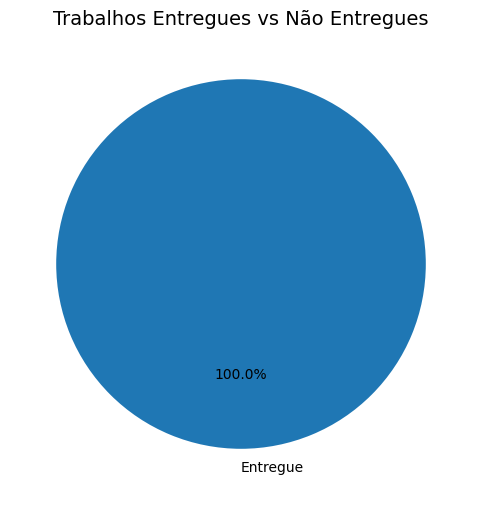

In [134]:
df_trabalhos = pegar_trabalhos_dataframe("ibmec_13897470")
plotar_trabalhos_pizza(df_trabalhos)